In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import localConfig

def matrix_to_tensor(H, m, n):
    H_tensor = np.zeros((m, m, n, n))
    for i in range(m):
        for j in range(m):
            for k in range(n):
                for l in range(n):
                    H_tensor[i, j, k, l] = H[i * m + j, k * n + l]
    return H_tensor

def transform_image(H_tensor, f):
    m, _, n, _ = H_tensor.shape
    g = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            for k in range(n):
                for l in range(n):
                    g[i, j] += H_tensor[i, j, k, l] * f[k, l]
    return g


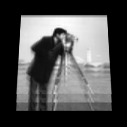

In [3]:
f = Image.open(localConfig.DATA_PATH + 'sample_image64/Cameraman64.png')
f = f.convert('L')
f = np.asarray(f) / 255

H_matrix = np.load(localConfig.DATA_PATH + 'systemMatrix/H_matrix_true.npy')

m = int(np.sqrt(H_matrix.shape[0]))
n = int(np.sqrt(H_matrix.shape[1]))

H_tensor = matrix_to_tensor(H_matrix, m, n)

g = transform_image(H_tensor, f)

fig, ax = plt.subplots(figsize=g.shape[::-1], dpi=1, tight_layout=True)
ax.imshow(g, cmap='gray')
ax.axis('off')
plt.show()

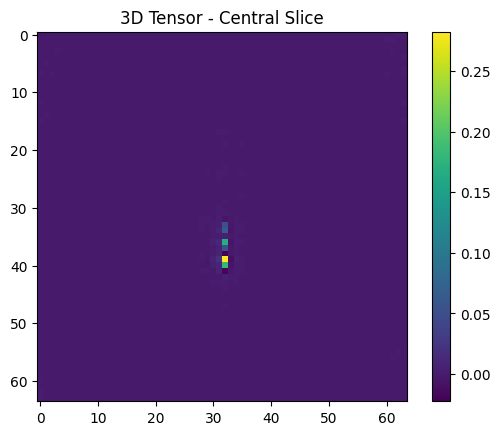

In [6]:
plt.imshow(H_tensor[64,64], cmap='viridis')
plt.colorbar()
plt.title("3D Tensor - Central Slice")
plt.show()

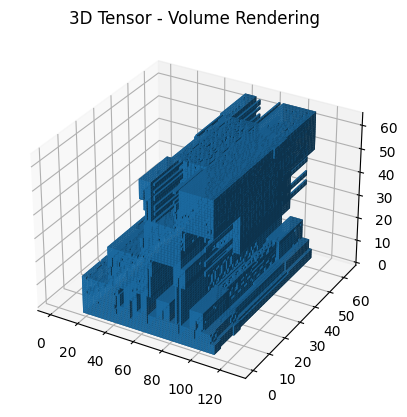

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# 3Dボリュームレンダリング
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(H_tensor[64], edgecolor='none')
ax.set_title("3D Tensor - Volume Rendering")
plt.show()

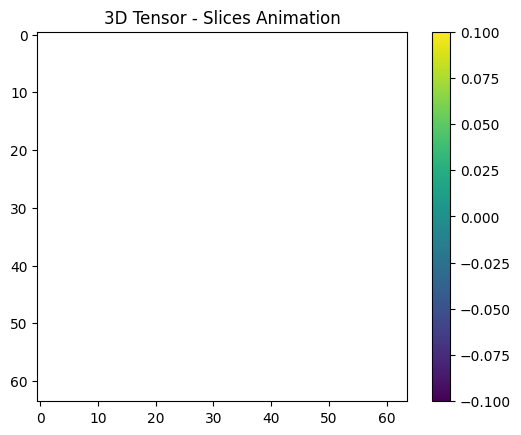

In [8]:
import matplotlib.animation as animation

# アニメーションを作成
fig = plt.figure()
imgs = []
for i in range(H_tensor[64].shape[0]):
    img = plt.imshow(H_tensor[64][i], animated=True, cmap='viridis')
    imgs.append([img])

ani = animation.ArtistAnimation(fig, imgs, interval=100, blit=True, repeat_delay=1000)
plt.colorbar()
plt.title("3D Tensor - Slices Animation")
plt.show()

In [11]:
from numpy import reshape
# 入力画像fとベクトル変換行列Hを定義
f = np.random.rand(3, 3)
H = np.random.rand(16, 9)

# 画像のサイズを取得
m = int(np.sqrt(H.shape[0]))
n = int(np.sqrt(H.shape[1]))

# ベクトル変換行列Hをテンソル形式に変換
H_tensor = matrix_to_tensor(H, m, n)

# 画像fから画像gへの変換を行う
g = transform_image(H_tensor, f)

print("Input image (f):")
print(f)
print("Output image (g):")
print(g)
print("Validation:")
print(reshape(H @ f.flatten(), (m, m)))
print("Tensor H:")
print(H_tensor)
print(H_tensor.shape)

Input image (f):
[[0.96569223 0.56905755 0.56494347]
 [0.67586203 0.84323279 0.35135994]
 [0.4258845  0.81455884 0.65200412]]
Output image (g):
[[3.55670736 2.58151796 2.36510888 2.57920631]
 [2.04164401 3.2058142  3.43384275 3.04316503]
 [3.25953771 3.32195681 3.39512662 3.45354144]
 [3.4852461  1.6661657  2.4510027  2.59403104]]
Validation:
[[3.55670736 2.58151796 2.36510888 2.57920631]
 [2.04164401 3.2058142  3.43384275 3.04316503]
 [3.25953771 3.32195681 3.39512662 3.45354144]
 [3.4852461  1.6661657  2.4510027  2.59403104]]
Tensor H:
[[[[0.47065775 0.9327022  0.25764614]
   [0.33060474 0.62838832 0.96075571]
   [0.54658459 0.74647112 0.75791187]]

  [[0.23463992 0.70072253 0.82254127]
   [0.49330995 0.0554865  0.54087275]
   [0.64089787 0.34738078 0.56033109]]

  [[0.51455167 0.22339141 0.83413463]
   [0.45657734 0.33692189 0.61473801]
   [0.03180541 0.07681369 0.59056832]]

  [[0.223021   0.68926481 0.55973905]
   [0.51865634 0.84688254 0.19774869]
   [0.07653348 0.58148625 0.0229